Objetivos:
======
* Utilizar Jupyter Notebooks
* Introducción a metodos númericos con `numpy`
* Graficar resultados (matplotlib)

1. Resolución de sistemas de ecuaciones lineales: numpy
--------------------------------------------------------

El siguiente sistema de equaciones lineales

\begin{equation}
10a + 2b = 20 \\ 
3a + 7b = 19
\end{equation}

Se puede escribir como 

\begin{equation}
\left[ \begin{array}{ccc} 10 & 2 \\ 3 & 7 \\ \end{array} \right]\left[ \begin{array}{c} a \\ b \\ \end{array} \right] = \left[ \begin{array}{c} 20 \\ 19 \\ \end{array} \right]
\end{equation}

O de manera más compacta:

\begin{equation} 
AX = B
\end{equation}

En donde:

\begin{align}
A & = \left[ \begin{array}{ccc} 10 & 2 \\ 3 & 7 \\ \end{array} \right] \\
X &= \left[ \begin{array}{c} a \\ b \\ \end{array} \right] \\
B &= \left[ \begin{array}{c} 20 \\ 19 \\ \end{array} \right] \\
\end{align}

Usando algebra lineal podemos encontrar $X$:

\begin{align}
AX &= B \\
A^{-1} AX &= A^{-1}B \\
X &= A^{-1}B
\end{align}

Para resolver este sistema en Python utilizaremos la libreria [numpy](http://www.numpy.org/)

In [2]:
# Carga la libreria numpy y la renombra np (simplemente para ser más conciso)
import numpy as np 

# Definiendo matrices
A = np.matrix([[10,2], [3,7]])
B = np.matrix([[20], [19]])

# Calculando la inversa de A
A_inverse = np.linalg.inv(A)

# Resolviendo para X
X = A_inverse * B # esta es la libreria de al
print X


[[ 1.59375]
 [ 2.03125]]


Ejercicios
-----------

Resuelve los siguientes sistemas de ecuaciones, definiendo una función que tome como input $A$ y $B$, y entregue como resultado $X$.

1. Sistema de 3x3

    \begin{align}
    10a + 2b + 3c &= 20 \\ 
    3a + 7b + 5c &= 19 \\
    3a + 7b + 7c &= 15
    \end{align}

2. Sistema de 4x4

    \begin{align}
    10a + 2b + 3c + 3d &= 20 \\ 
    3a + 7b + 5c + 1d &= 19 \\
    3a + 7b + 7c + 10d &= 15 \\
    4a + 9b + 8c + 9d &= 18 
    \end{align}


2. Estadistica: distribución normal
-----------------------------------

En teoría de la probabilidad, la [distribución normal](https://en.wikipedia.org/wiki/Normal_distribution) 
es una de las más comunmente usadas. Matematicamente corresponde a:

\begin{equation}
f(x | \mu,\sigma^2)={{1}\over{ \sqrt{ 2\pi \sigma^2 } } } e^{- {{(x-\mu)^2} \over {2 \sigma^2}} }
\end{equation}

En Python, la libreria numpy tiene una implementación de esta distribución. Veamos un ejempplo.

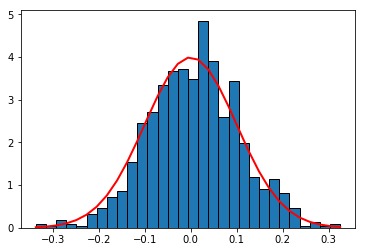

array([ 0.09059374,  0.04529687,  0.18118748,  0.09059374,  0.04529687,
        0.31707809,  0.4529687 ,  0.72474992,  0.86064053,  1.54009358,
        2.44603098,  2.71781221,  3.35196839,  3.66904648,  3.71434335,
        3.487859  ,  4.8467651 ,  3.89553083,  2.58192159,  3.44256213,
        1.99306228,  1.17771862,  0.9059374 ,  1.13242175,  0.81534366,
        0.4529687 ,  0.04529687,  0.13589061,  0.04529687,  0.09059374])

In [18]:
mu, sigma = 0, 0.1 # promedio y desviación estandar
s = np.random.normal(mu, sigma, 1000) # 1000 puntos generados aleatoriamente

# Grafico de los puntos muestreados (samples)
import matplotlib.pyplot as plt

n, bins, blabla = plt.hist(s, 30, normed=True,edgecolor='black') # Crea un histograma
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r') # Crea una linea calculada usando la ecuacion de la distribución normal
plt.show() # Muestra el grafico en pantalla
n

La generación de datos aleatorios (usando la distribución normal u otras) es especialmente útil cuando se necesita simular datos experimentales. Esto se hará evidente en la próxima sección.

Ejercicios
-----------

Simula y gráfica tres distribuciones normales, cada una con los siguientes parámetros:

1. $\mu=10$, $\sigma=0.7$
2. $\mu=-10$, $\sigma=0.7$
3. $\mu=10$, $\sigma=2.7$

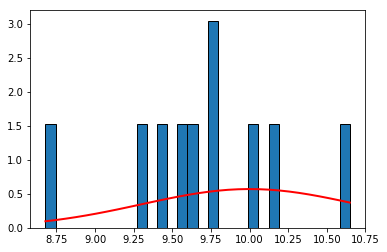

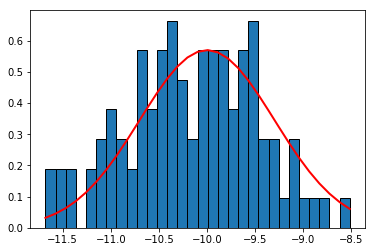

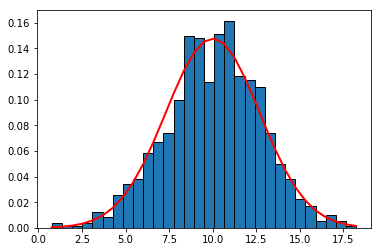

In [26]:
def plotNormal(mu,sigma,n):
    s = np.random.normal(mu, sigma, n) # 1000 puntos generados aleatoriamente

    # Grafico de los puntos muestreados (samples)
    import matplotlib.pyplot as plt

    n, bins, blabla = plt.hist(s, 30, normed=True,edgecolor='black') # Crea un histograma
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r') # Crea una linea calculada usando la ecuacion de la distribución normal
    plt.show()

plotNormal(10,0.7,10)
plotNormal(-10,0.7,100)
plotNormal(10,2.7,1000)

3. Ajuste por minimización de los minimos cuadrados
---------------------------------------------------

Dado un conjunto de datos experimentales $\{t,y\} \in R^n$ y una función $f(t|\alpha)$ el objetivo es encontrar el valor de $\alpha$ que minimize la suma de los errores (también llamados residuales):

\begin{equation}
 S=\sum_i^n r_i^2 \\
 r_i = y_i-f(t_i|\alpha)
\end{equation}

Ejemplo:

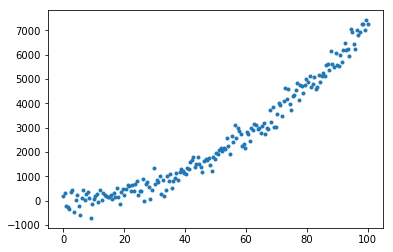

array([  0.        ,   2.22222222,   4.44444444,   6.66666667,
         8.88888889,  11.11111111,  13.33333333,  15.55555556,
        17.77777778,  20.        ])

In [35]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Generar datos {t,y}, en donde y=t^2
t = np.linspace(0,100,200)
parabola = t**1.93 
noise = np.random.normal(0,300,200)
y = parabola + noise
plt.plot(t,y,'.')
plt.show()


Para encontrar el valor de $\alpha$ usaremos la funcion leastsq de scipy

(array([ 1.92922765]), 1)


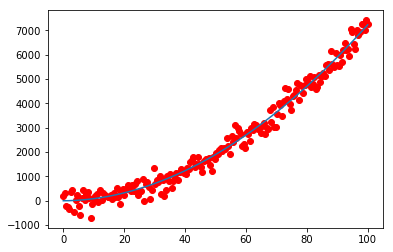

In [39]:
from scipy.optimize import leastsq
def residual(alpha,x,y):
    model = np.power(x,alpha)
    return y-model

out=leastsq(residual,2,args=(t,y))
print out
out[0][0]
fit=t**out[0][0]
plt.plot(t,y,'ro')
plt.plot(t,fit)
plt.show()

Ejercicios
----------

1. Crear una sequencia $\{t,y\} \in R^{200}$ en donde: $y=sin(t)\alpha$, y $\alpha=4.3$.
2. Agregar ruido normal ($\mu=0, \sigma=0.2$) a $y$, para obtener $y'$.
3. Dados $\{t,y'\}$ crear una función para encontrar el valor de $\alpha$.
4. Graficar los resultados, incluyendo la curva ajustada.
5. Repetir lo anterior, pero esta vez con $y=mt+b$, en donde $m=2$ y $b=0.5$.


Tarea
=====

1. Obligatorio: crear una cuenta en [github](https://github.com). 
2. Opcional: ver el siguiente [video](https://www.youtube.com/watch?v=CEN4XNth61o)

(Tus trabajos serán evaluados a través de github)

Extra: Espacio factible de un problema de optmización lineal
---------------------------------------------------------------------

Este no es un ejercicio pero una demostración gráfica del espacio factible de un problema de optimización lineal. Este concepto es simple pero no siempre fácil de entender. Abajo usaremos Python para entender a través de un ejemplo simple de que se trata.

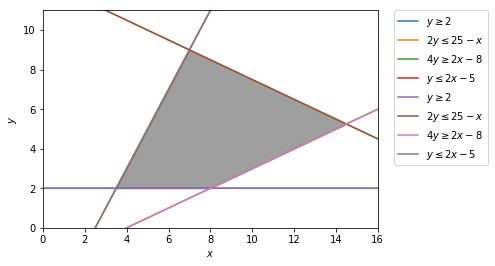

In [49]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()